In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding = 'latin1')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
## let's remove some unnecessary features 
## date , holiday or not season  
df.drop(['Date' , 'Holiday', 'Seasons'] , axis = 1  , inplace = True)

In [6]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [7]:
df.columns = [ 'bike_count' , 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional' ] 

In [8]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [9]:
df['functional'] = (df['functional']=='Yes').astype(int)

In [10]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [11]:
df.drop(['hour'],axis=1, inplace = True)

In [12]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


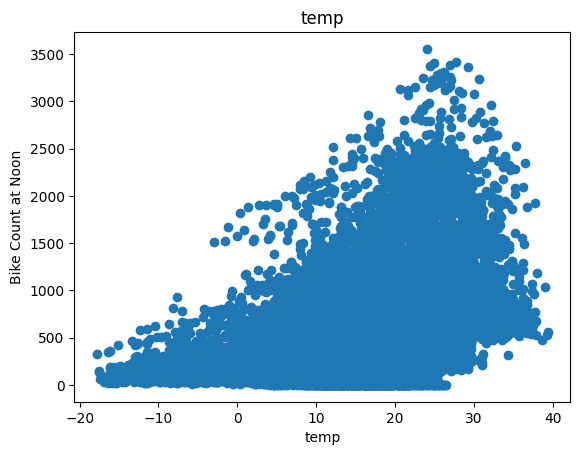

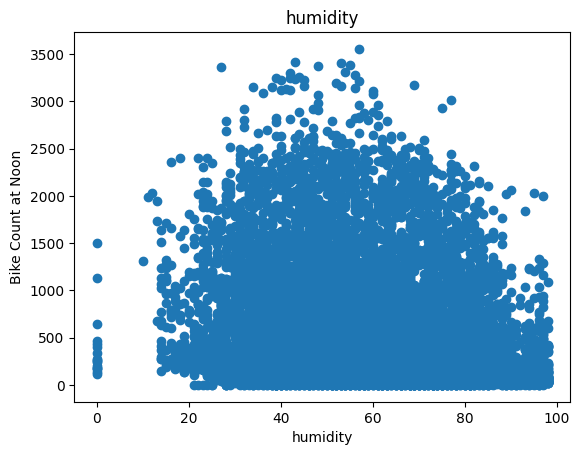

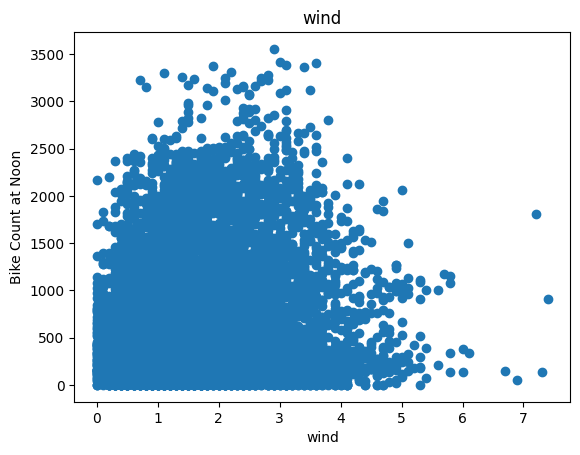

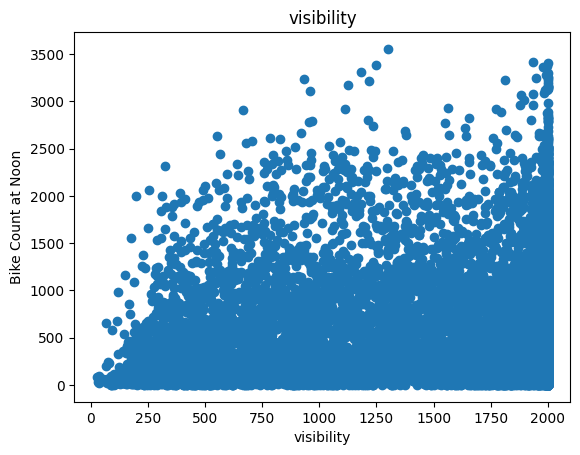

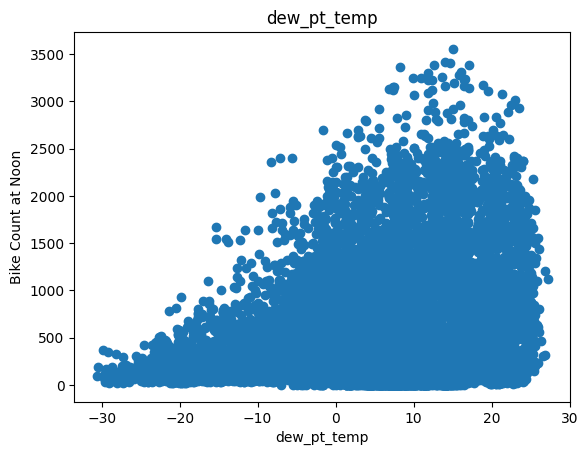

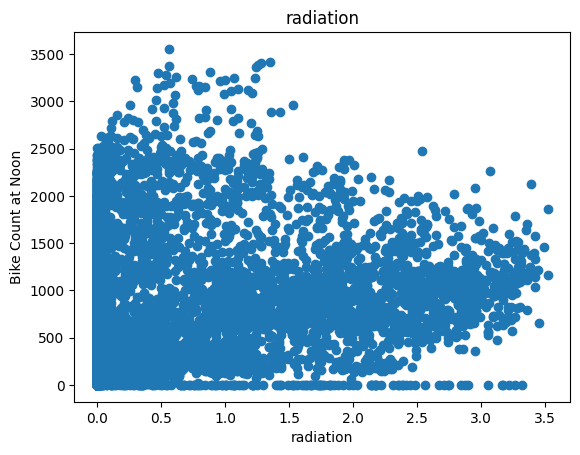

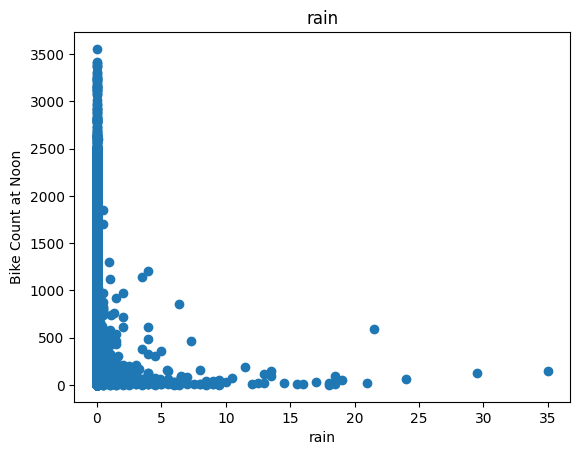

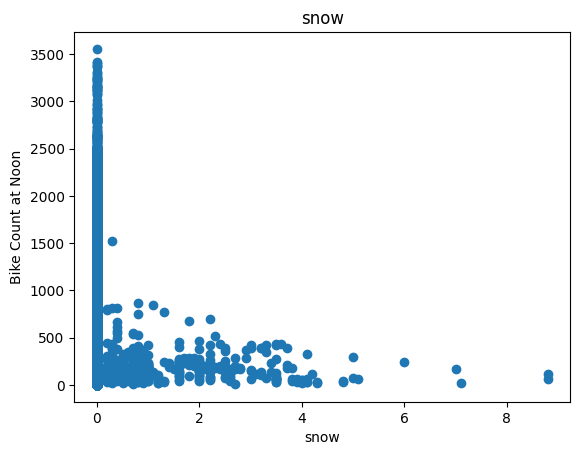

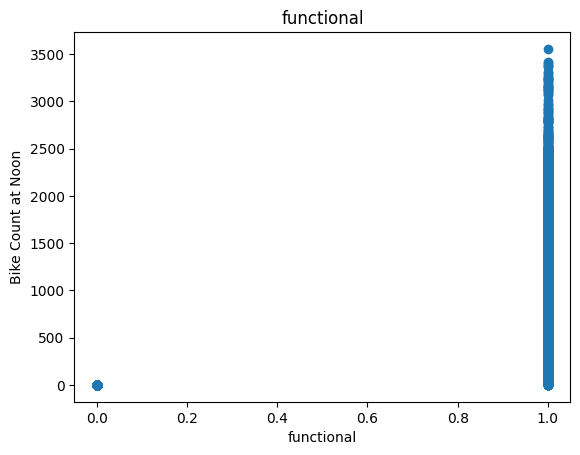

In [13]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel('Bike Count at Noon')
    plt.xlabel(label)
    plt.show()

In [14]:
## she removed wind visibility, functional thinking they don't matter much 
df.drop(['wind','visibility','functional'], axis=1,inplace=True)

In [15]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


In [16]:
## dividing this much data  into three parts , train, valid, test 

In [17]:
train, valid , test = np.split(df.sample(frac=1), [int(.6*len(df)), int (.8*len(df))])

C:\Users\deves\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [34]:
def get_xy(dataframe, y_label, x_labels = None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else : 
        if len(x_labels) == 1:
            x = dataframe[x_labels[0]].values.reshape(-1,1)
        else : 
            x = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((x,y))
    return data, x ,y 

In [35]:
_ , x_train_temp, y_train_temp = get_xy(train,"bike_count", x_labels=['temp'])
_ , x_valid_temp, y_valid_temp = get_xy(valid,"bike_count", x_labels=['temp'])
_ , x_test_temp, y_test_temp = get_xy(test,"bike_count", x_labels=['temp'])


## staring to implement a linear Regression 

In [36]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [37]:
x_train_temp

array([[21.4],
       [ 9.7],
       [17.7],
       ...,
       [12.2],
       [ 9.8],
       [23.2]])

In [38]:
print(temp_reg.coef_, temp_reg.intercept_)

[[29.5423785]] [320.02031479]


In [39]:
temp_reg.score(x_test_temp, y_test_temp)

0.28777044011954556

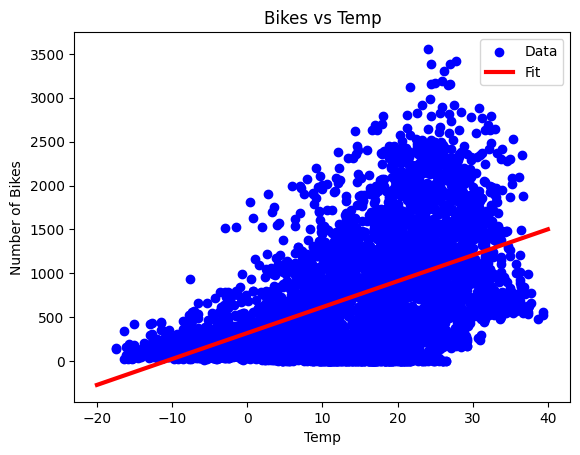

In [24]:
plt.scatter(x_train_temp , y_train_temp, label='Data', color ='blue')
x = tf.linspace(-20,40,100) 
plt.plot(x ,temp_reg.predict(np.array(x).reshape(-1,1)) , label = 'Fit', color = 'red' , linewidth = 3) 
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('Temp')
plt.show()

## now doing multiple liear regression the above one only for temperature as only feature 

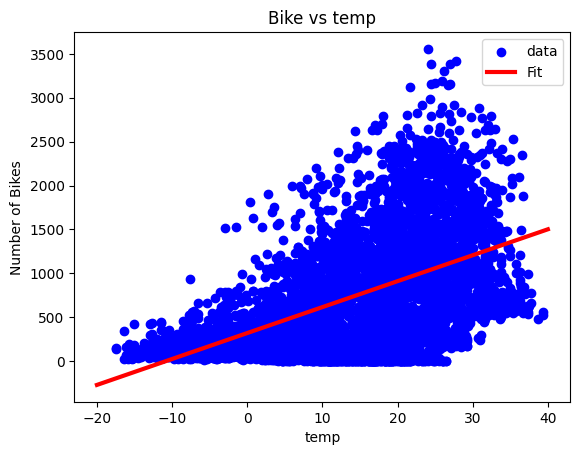

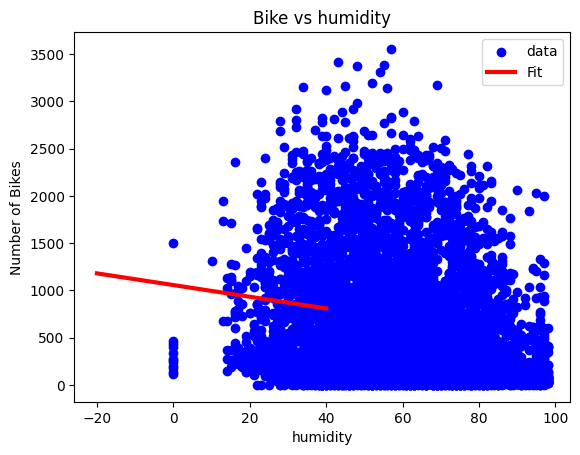

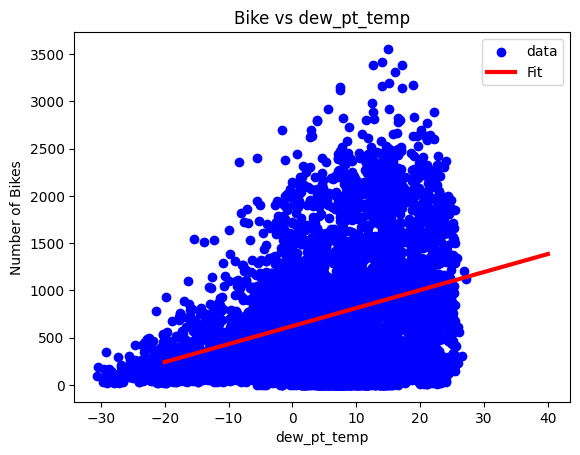

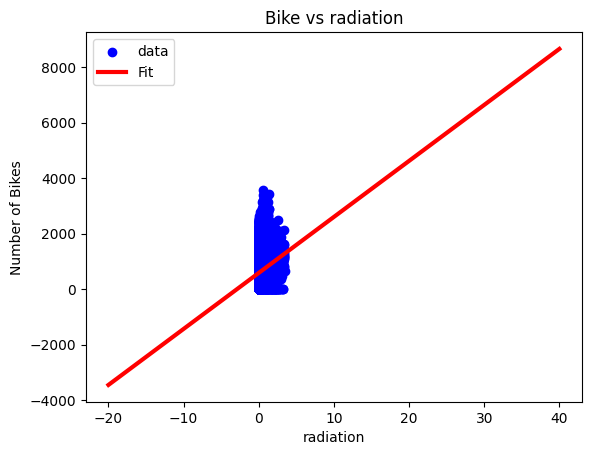

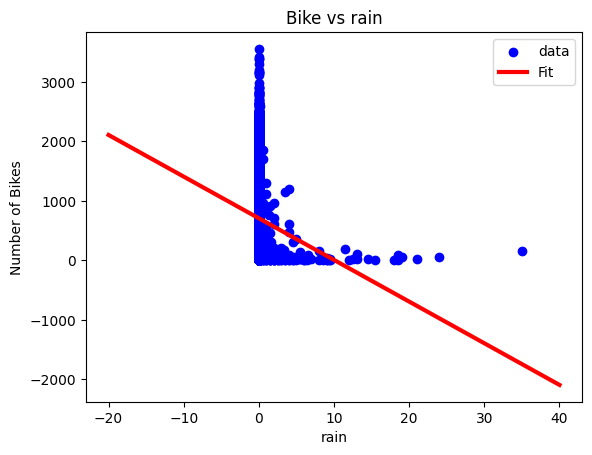

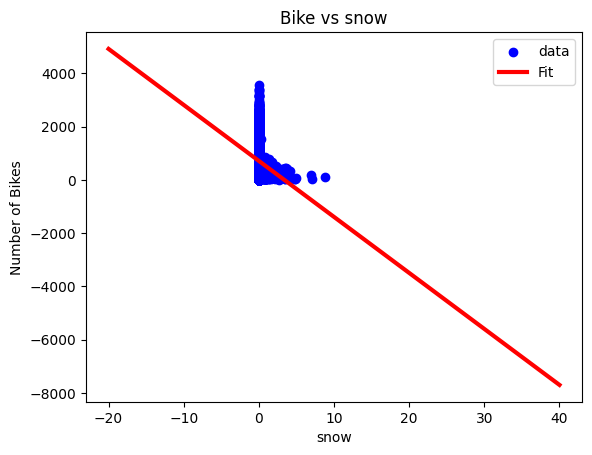

In [40]:
for col in df.columns[1:] : 
    _ , x_train_col, y_train_col = get_xy(train,"bike_count", x_labels=[col])
    _ , x_valid_col, y_valid_col = get_xy(valid,"bike_count", x_labels=[col])
    _ , x_test_col, y_test_col = get_xy(test,"bike_count", x_labels=[col])
    col_reg = LinearRegression()
    col_reg.fit(x_train_col,y_train_col)
    ## plotting 
    plt.scatter(x_train_col, y_train_col, label = 'data', color = 'blue')
    x = tf.linspace(-20,40,100) 
    plt.plot(x ,col_reg.predict(np.array(x).reshape(-1,1)) , label = 'Fit', color = 'red' , linewidth = 3) 
    plt.legend()
    plt.title('Bike vs '+col)
    plt.ylabel('Number of Bikes')
    plt.xlabel(col)
    plt.show()

In [41]:
## doing multiple feature regression together 
    # train , val , test = np.split(df.sample(frac=1) , [int(0.6*len(df)) , int(0.8*len(df))]) 
xlabels = list(df.columns[1:])
t_ , x_train_all, y_train_all = get_xy(train,"bike_count", x_labels= xlabels)
t_ , x_valid_all, y_valid_all = get_xy(valid,"bike_count", x_labels= xlabels)
t_ , x_test_all, y_test_all = get_xy(test,"bike_count", x_labels= xlabels)
all_reg = LinearRegression()
all_reg.fit(x_train_all,y_train_all)
all_reg.score(x_train_all ,y_train_all)
    ## plotting 
    # plt.scatter(x_train_all, y_train_all, label = 'data', color = 'blue')
    # x = tf.linspace(-20,40,100) 
    # plt.plot(x ,col_reg.predict(np.array(x).reshape(-1,1)) , label = 'Fit', color = 'red' , linewidth = 3) 
    # plt.legend()
    # plt.title('Bike vs '+col)
    # plt.ylabel('Number of Bikes')
    # plt.xlabel(col)
    # plt.show()

0.4008887005170466

In [42]:
## reg score imporvoed by involving other features means other are effecting positively 

ValueError: x and y must be the same size

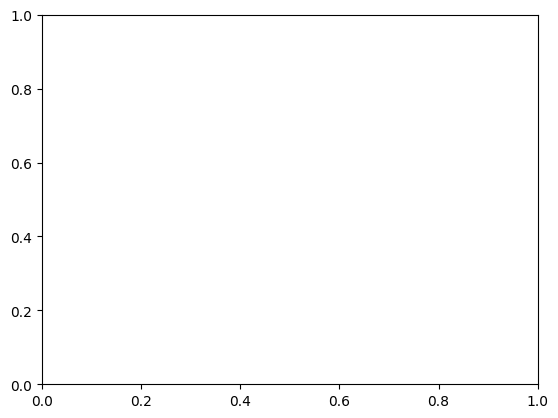

In [62]:
plt.scatter(x_train_all, y_train_all, label = 'data', color = 'blue')
x = tf.linspace(-20,40,100) 
plt.plot(x ,col_reg.predict(np.array(x).reshape(-1,1)) , label = 'Fit', color = 'red' , linewidth = 3) 
plt.legend()
plt.title('Bike vs All')
plt.ylabel('Number of Bikes')
plt.xlabel('All')
plt.show()

now implementing regression with Nural Network 

In [50]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [51]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None) 
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [52]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [53]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01 ) , loss = 'mean_squared_error')

In [56]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp ,
    verbose = 0,
    epochs = 1000,
    validation_data = (x_valid_temp,y_valid_temp)
)

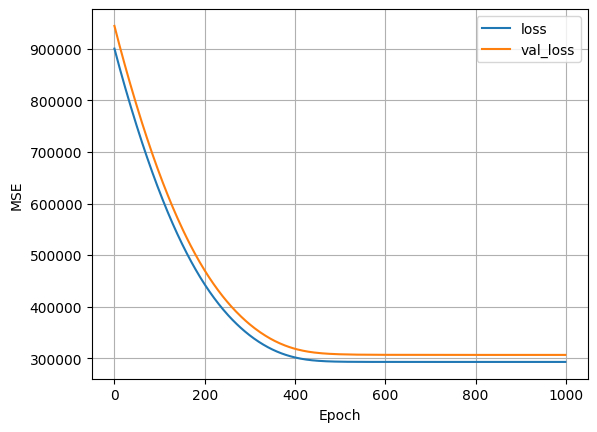

In [57]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


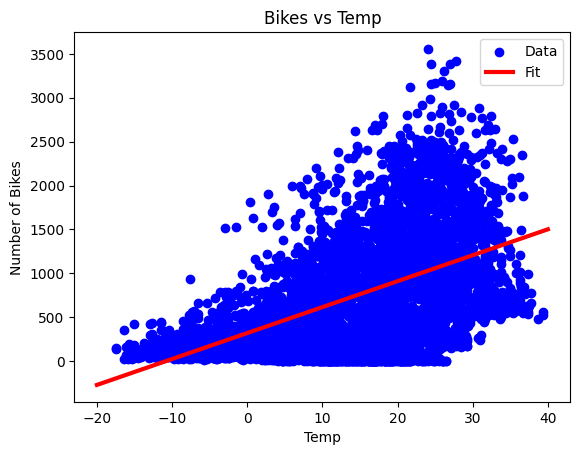

In [58]:
plt.scatter(x_train_temp , y_train_temp, label='Data', color ='blue')
x = tf.linspace(-20,40,100) 
plt.plot(x ,temp_nn_model.predict(np.array(x).reshape(-1,1)) , label = 'Fit', color = 'red' , linewidth = 3) 
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('Temp')
plt.show()

## ploting that for data of multiple Linear Regression 

In [59]:
## first plotting that one that we left ,

ValueError: x and y must be the same size

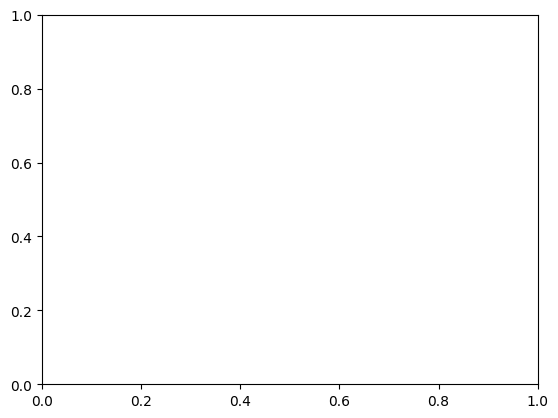

In [61]:
## plotting 
plt.scatter(x_train_all, y_train_all, label = 'data', color = 'blue')
x = tf.linspace(-20,40,100) 
plt.plot(x ,col_reg.predict(np.array(x).reshape(-1,1)) , label = 'Fit', color = 'red' , linewidth = 3) 
plt.legend()
plt.title('Bike vs All')
plt.ylabel('Number of Bikes')
plt.xlabel(col)
plt.show()